Geocoding the given address using Folium

In [5]:
import pandas as pd
import folium
from geopy.geocoders import ArcGIS

# Define the address to geocode
address = "1401 Pine Street Kannapolis NC 28081"

# Create an instance of the ArcGIS geocoder
geolocator = ArcGIS()

# Geocode the address
location = geolocator.geocode(address)

# Get the latitude and longitude coordinates
if location is not None:
    lat = location.latitude
    lon = location.longitude

# Create a map centered at the geocoded address
m = folium.Map(location=[lat, lon], zoom_start=15)

# Add a marker for the geocoded address
marker = folium.Marker(location=[lat, lon])
marker.add_to(m)

# Get the latitude and longitude coordinates of the marker
marker_lat = marker.location[0]
marker_lon = marker.location[1]

# Print the latitude and longitude coordinates of the marker
print("Marker latitude:", marker_lat)
print("Marker longitude:", marker_lon)


# Add a marker for the geocoded address
folium.Marker(location=[lat, lon]).add_to(m)

# Display the map
m


Marker latitude: 35.496861979131054
Marker longitude: -80.64736301109538


Geocoding address using Nominatim

In [6]:
#Using other way
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Define the address to geocode
address = "1401 Pine Street Kannapolis NC 28081"

# Create an instance of the Nominatim geocoder
geolocator = Nominatim(user_agent="my_app")

# Geocode the address
location = geolocator.geocode(address)

# Get the latitude and longitude coordinates
if location is not None:
    lat = location.latitude
    lon = location.longitude

# Create a map centered at the geocoded address
m = folium.Map(location=[lat, lon], zoom_start=15)

# Add a marker for the geocoded address
marker = folium.Marker(location=[lat, lon])
marker.add_to(m)

# Get the latitude and longitude coordinates of the marker
marker_lat = marker.location[0]
marker_lon = marker.location[1]

# Print the latitude and longitude coordinates of the marker
print("Marker latitude:", marker_lat)
print("Marker longitude:", marker_lon)


# Add a marker for the geocoded address
folium.Marker(location=[lat, lon]).add_to(m)

# Display the map
m

Marker latitude: 35.49725683673469
Marker longitude: -80.6454785510204


**Findings: It appears that these coordinates are slightly different from the previous coordinates. This could be due to variations in the geocoding service or differences in the versions of the geocoding service. However, the difference between the two sets of coordinates is small, so the location of the marker on the map are pretty close but not precise.**

Creating a list of 10 different addresses

In [7]:
import random

# Define the base address
house_number = 1401
street_name = "Pine Street"
city = "Kannapolis"
state = "NC"
zip_code = 28081

base_address = f"{house_number} {street_name} {city} {state} {zip_code}"

# Define a list of possible house numbers to use
house_numbers = [1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500]

# Create a list of 10 addresses related to the base address
addresses = []
for i in range(10):
    # Choose a random house number from the list
    random_house_number = random.choice(house_numbers)
    
    # Replace the house number in the base address with the random house number
    address = base_address.replace(str(house_number), str(random_house_number))
    
    # Add the new address to the list
    addresses.append(address)

print(addresses)

['1450 Pine Street Kannapolis NC 28081', '1500 Pine Street Kannapolis NC 28081', '1480 Pine Street Kannapolis NC 28081', '1470 Pine Street Kannapolis NC 28081', '1450 Pine Street Kannapolis NC 28081', '1430 Pine Street Kannapolis NC 28081', '1490 Pine Street Kannapolis NC 28081', '1470 Pine Street Kannapolis NC 28081', '1500 Pine Street Kannapolis NC 28081', '1460 Pine Street Kannapolis NC 28081']


Creating the data table of 50 largest cities from the website of World atlas

In [15]:
import pandas as pd

# Define the URL of the webpage containing the data
url = "http://www.worldatlas.com/cities/10-largest-cities-in-the-world.html"

# Read the HTML into a pandas DataFrame
dfs = pd.read_html(url)

# Select the first DataFrame in the list (assuming the desired data is in the first table on the page)
df = dfs[0]

print(df.info())



Index(['Rank', 'Name', 'Country', 'Population'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        50 non-null     int64 
 1   Name        50 non-null     object
 2   Country     50 non-null     object
 3   Population  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
None


**Data table of 50 largest Cities**

In [16]:
df.head(50)

,Rank,Name,Country,Population
0,1,Tokyo,Japan,37274000
1,2,Delhi,India,32065760
2,3,Shanghai,China,28516904
3,4,Dhaka,Bangladesh,22478116
4,5,Sao Paulo,Brazil,22429800
5,6,Mexico City,Mexico,22085140
6,7,Cairo,Egypt,21750020
7,8,Beijing,China,21333332
8,9,Mumbai,India,20961472
9,10,Osaka,Japan,19059856


**Using pandas functions**

In [20]:
import pandas as pd

# List the column headings
print(df.columns)

Index(['Rank', 'Name', 'Country', 'Population'], dtype='object')


In [22]:
#showing last 5 rows

df.tail(5)

,Rank,Name,Country,Population
45,46,Hangzhou,China,8044878
46,47,Surat,India,7784276
47,48,Suzhou,China,7764499
48,49,Hong Kong,Hong Kong,7643256
49,50,Riyadh,Saudi Arabia,7538200


In [23]:
#Selecting Specific number of row for viewing
df[10:20]

,Rank,Name,Country,Population
10,11,Chongqing,China,16874740
11,12,Karachi,Pakistan,16839950
12,13,Istanbul,Turkey,15636243
13,14,Kinshasa,DR Congo,15628085
14,15,Lagos,Nigeria,15387639
15,16,Buenos Aires,Argentina,15369919
16,17,Kolkata,India,15133888
17,18,Manila,Philippines,14406059
18,19,Tianjin,China,14011828
19,20,Guangzhou,China,13964637


In [24]:
#Selecting Specific column for overview
df['Population'][10:20]

10    16874740
11    16839950
12    15636243
13    15628085
14    15387639
15    15369919
16    15133888
17    14406059
18    14011828
19    13964637
Name: Population, dtype: int64

<Axes: >

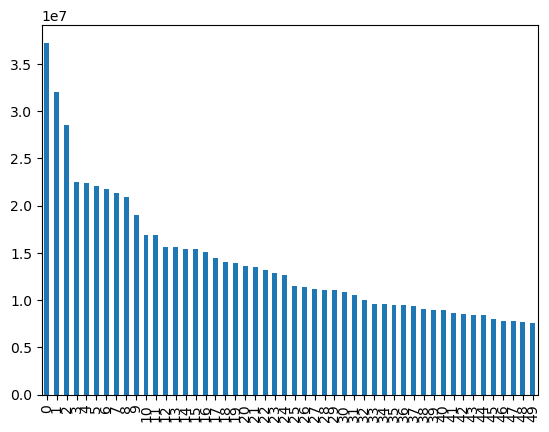

In [26]:
#Plotting bar chart
df.Population[:50].plot(kind='bar')

In [29]:
# finding the mean Pop
df['Population'].mean()

14034063.92

Displaying AGOL layers creating user input of largest cities

In [51]:
import arcgis
from arcgis.gis import GIS

# Ask the user to input a city name
city_name = input("Enter the name of a city: ")

# Initialize an ArcGIS Online (AGOL) connection
gis = GIS()

# Search for layers related to the specified city
items = gis.content.search(query=f"title:{city_name} AND owner:esri* AND type:Feature Service")

# Print the titles of the matching layers
print("Matching layers:")
for item in items:
    print(item.title)

Enter the name of a city: Tokyo
Matching layers:
東京都 避難所
東京都 避難場所
tokyo_23
東京都患者発生発表数
tokyo_osm_point_demo01
Tokyo 2020 Event locations


In [52]:
import arcgis
from arcgis.gis import GIS

# Ask the user to input a city name
city_name = input("Enter the name of a city: ")

# Initialize an ArcGIS Online (AGOL) connection
gis = GIS()

# Search for layers related to the specified city
items = gis.content.search(query=f"title:{city_name} AND owner:esri* AND type:Feature Service")

# Print the titles of the matching layers
print("Matching layers:")
for item in items:
    print(item.title)

Enter the name of a city: Kolkata
Matching layers:
Kolkata Municipal Corporation Ward Boundaries


**Some other simple exploration are done in a separate jupyter file.**

Adding a column of continent for 5 cities

In [63]:
#Adding a column for five cities

import pandas as pd

import pandas as pd

# Define the table as a pandas DataFrame
data = {
    "Rank": [1, 2, 3, 4, 5],
    "Name": ["Tokyo", "Delhi", "Shanghai", "Dhaka", "Sao Paulo"],
    "Country": ["Japan", "India", "China", "Bangladesh", "Brazil"],
    "Population": [37274000, 32065760, 28516904, 22478116, 22429800]
}
table = pd.DataFrame(data)

# Define a dictionary mapping countries to continents
continents = {
    "Japan": "Asia",
    "India": "Asia",
    "China": "Asia",
    "Bangladesh": "Asia",
    "Brazil": "South America"
}

# Add a new column called "Continent" based on the country column using a control structure
table["Continent"] = ""
for i in range(len(table)):
    country = table.loc[i, "Country"]
    if country in continents:
        table.loc[i, "Continent"] = continents[country]

# Display the table with the new column
print(table)

   Rank       Name     Country  Population      Continent
0     1      Tokyo       Japan    37274000           Asia
1     2      Delhi       India    32065760           Asia
2     3   Shanghai       China    28516904           Asia
3     4      Dhaka  Bangladesh    22478116           Asia
4     5  Sao Paulo      Brazil    22429800  South America


Adding a column of density of all largest cities

In [ ]:
# Add a new column to the DataFrame that calculates the population density
df["Area"] = [1572, 3694, 6302, 301, 1213, 1403, 1285, 2190, 8300, 1510,
              605, 1295, 181, 150, 492, 369, 181, 157, 181, 572,
              547, 1120, 470, 1566, 8300, 342, 324, 686, 234, 380,
              606, 175, 157, 361, 1688, 7283, 360, 259, 1049, 176,
              234, 811, 599, 356, 2095, 310, 1566, 500, 641, 464]

df["Density"] = df["Population"] / df["Area"]

# Show the updated data
print(df)

# Thanks!